<a href="https://colab.research.google.com/github/harperd/machine-learning/blob/master/notebooks/multiclass-logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Logistic Regression

Use logistic regression to recognize hand-written digits (0 to 9).

## Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import scipy.optimize as opt
import google.colab as colab
import io

from scipy.io import loadmat

# Allow saving our graphs in the notebook
%matplotlib inline

Chart Dark Theme For Google Colab Dark Mode

In [0]:
style.use('dark_background')

## Read Sample Data

In [3]:
mat_file = colab.files.upload()
!ls -l

Saving ex3data1.mat to ex3data1.mat
total 7340
-rw-r--r-- 1 root root 7511764 Aug  1 19:46 ex3data1.mat
drwxr-xr-x 1 root root    4096 Jul 30 16:17 sample_data


In [4]:
mat_data = loadmat('ex3data1.mat')
mat_data

{'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [5]:
X = mat_data['X']
# Add bias column
X = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))

y = mat_data['y']
theta = np.array(np.zeros(X.shape[1]), ndmin = 2)

print(f'X Shape: {X.shape}')
print(f'y Shape: {y.shape}')
print(f'Theta Shape: {theta.shape}')

X Shape: (5000, 401)
y Shape: (5000, 1)
Theta Shape: (1, 401)


![Hand written numbers](https://github.com/harperd/machine-learning/blob/master/images/ex3-1.png?raw=1)

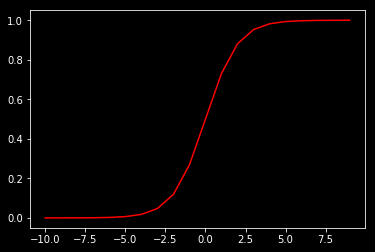

In [6]:
def sigmoid(z):
  return 1 / ( 1 + np.exp(-z) )

nums = np.arange(-10, 10, step = 1)

fig, ax = plt.subplots()
ax.plot(nums, sigmoid(nums), 'r')

plt.show()

In [0]:
def compute_hypothesis(theta, X):
  # Compute our hypothesis
  z = X @ theta.T

  # Scale our hypothesis using Sigmoid
  # Here, if the parameter is zero then the sigmoid value will be 0.5.
  h = sigmoid(z)
  
  return h

In [0]:
def compute_cost(theta, X, y):
  # Fix for minimize function
  theta = np.array(theta, ndmin = 2)
  X = np.array(X, ndmin = 2)
  y = np.array(y, ndmin = 2)

  # Compute our hypothesis
  h = compute_hypothesis(theta, X)
    
  first = np.log(h) * -y
  second = np.log(1 - h) * (1 - y)

  # The number of examples
  m = len(y)
  
  return np.sum(first - second) / m

In [0]:
def compute_gradient(theta, X, y):
  # Fix for minimize function
  theta = np.array(theta, ndmin = 2)
  X = np.array(X, ndmin = 2)
  y = np.array(y, ndmin = 2)
  
  # Compute our hypothesis
  h = compute_hypothesis(theta, X)

  # Get the error
  error = h - y

  # The number of examples
  m = len(y)

  # Calculate the gradient
  gradient = ( error.T @ X ) / m

  return gradient

In [98]:
def train_model(theta, X, y):
  theta_min = {}
  max_range = np.max(np.unique(y)) + 1

  for digit in range(1, max_range):
    print(f'> Optimizing theta values for digit {digit}...')

    y_train = [ 1 if y_digit[0] == digit else 0 for y_digit in y ]
    y_train = np.array(y_train, ndmin = 2).T

    #print(y_train[0][0])
    #print(len(y_train[y_train == 1]))
    #print(len(y_train[y_train == 0]))

    result = opt.fmin_tnc(
      # Initial guess.
      x0 = theta,
      # Objective function to be minimized.
      func = compute_cost,
      # Gradient of func.
      fprime = compute_gradient,
      # Extra arguments passed to f and fprime.
      args = ( X, y_train ))
    
    theta_min[digit] = {}
    theta_min[digit] = {
        'theta': result[0],
        'iterations': result[1],
        'cost': compute_cost(result[0], X, y_train)
    }

    # print(f'  Iterations = {theta_min[digit]["iterations"]}, Cost = {theta_min[digit]["cost"]}')

  return theta_min

theta_min = train_model(theta, X, y)

> Optimizing theta values for digit 1...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


> Optimizing theta values for digit 2...
> Optimizing theta values for digit 3...


KeyboardInterrupt: ignored

In [44]:
def make_predictions(theta, X):
  # Compute our hypothesis
  h = compute_hypothesis(theta, X)
  
  # Make prediction of 1 or zero based on threshold.
  predictions = [ 1 if x >= 0.5 else 0 for x in h ]

  return predictions

def compute_accuracy(predictions, y):
  # Get the correct predictions where correct is 1 and
  # incorrect is 0.
  correct = [ 
      1 if p_val - y_val == 0 else 0 
      # The purpose of zip() is to map the similar index of multiple 
      # containers so that they can be used just using as single entity.
      for (p_val, y_val) in zip(predictions, y)
  ]
  
  # Calculate the overall accuracy.
  #
  # The map() function returns a list of the results after applying the given
  # function to each item of a given iterable (list, tuple etc.).
  accuracy = round(( sum(correct) / len(correct)) * 100)
  
  return accuracy

def compute_model_accuracy(theta_min, X, y):
  acuracy = 0

  for digit in theta_min.keys():
    predictions = make_predictions(theta_min[digit]['theta'], X)
    accuracy = acuracy + compute_accuracy(predictions, y)

  return round(accuracy / len(theta_min.keys()))

accuracy = compute_model_accuracy(theta_min, X, y)

print(f'Model accuracy: {accuracy}%')

Model accuracy: 1%
